# **Previsão da Economia de Combustível com Redes Neurais em Python**

#### Este tutorial irá guiá-lo através de um pipeline de Machine Learning usando Redes Neurais (TensorFlow/Keras) para prever a economia de combustível de veículos, com base em características fornecidas. Iremos cobrir o carregamento de dados, pré-processamento, construção, compilação e treinamento do modelo, e visualização dos resultados.

**Objetivo**: Prever a economia de combustível (Fuel Economy - FE) de um automóvel, dadas suas características.

**Pré-requisitos:**

*   Conhecimento básico de Python.
*   Noções de estruturas de dados como DataFrames do Pandas.
*   Conceitos introdutórios de Machine Learning (recursos, alvo, treinamento, teste).

## Passo 1: Carregar Bibliotecas Essenciais e o Conjunto de Dados

Nesta primeira etapa, importamos todas as bibliotecas Python que serão necessárias para o nosso projeto e carregamos o conjunto de dados fuel.csv.

In [1]:
# Importa bibliotecas necessárias
import numpy as np # Para operações numéricas, especialmente com arrays
import pandas as pd # Para manipulação de dados em DataFrames
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Para pré-processamento de dados
from sklearn.compose import make_column_transformer, make_column_selector # Para aplicar transformações a colunas específicas
from sklearn.model_selection import train_test_split # Para dividir dados em conjuntos de treino e teste (não usado no código fornecido, mas útil)

# Importa bibliotecas do TensorFlow/Keras para construir e treinar a rede neural
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
# --- Carregar o Conjunto de Dados ---
# Carrega o arquivo CSV 'fuel.csv' em um DataFrame do Pandas
fuel = pd.read_csv('fuel.csv')

In [5]:
# --- Separar Recursos (X) e Alvo (y) ---
# Cria uma cópia do DataFrame original para os recursos (X)
X = fuel.copy()

In [10]:
# Remove a coluna 'FE' (economia de combustível) de X e a armazena em y.
# 'FE' é o que queremos prever, ou seja, nossa variável alvo.
y = X.pop('FE')

In [11]:
print("Dados originais (cabeçalho):")
print(fuel.head())
print("\nPrimeiras 5 linhas dos recursos (X) após separar o alvo:")
print(X.head())
print("\nPrimeiras 5 linhas do alvo (y):")
print(y.head())

Dados originais (cabeçalho):
   EngDispl  NumCyl Transmission       FE AirAspirationMethod  NumGears  \
0       4.7       8          AM6  28.0198  NaturallyAspirated         6   
1       4.7       8           M6  25.6094  NaturallyAspirated         6   
2       4.2       8           M6  26.8000  NaturallyAspirated         6   
3       4.2       8          AM6  25.0451  NaturallyAspirated         6   
4       5.2      10          AM6  24.8000  NaturallyAspirated         6   

   TransLockup  TransCreeperGear          DriveDesc  IntakeValvePerCyl  \
0            1                 0  TwoWheelDriveRear                  2   
1            1                 0  TwoWheelDriveRear                  2   
2            1                 0      AllWheelDrive                  2   
3            1                 0      AllWheelDrive                  2   
4            0                 0      AllWheelDrive                  2   

   ExhaustValvesPerCyl CarlineClassDesc  VarValveTiming  VarValveLift  
0  

Explicação:

*   **import numpy as np:** NumPy é a base para computação numérica em Python, especialmente com arrays e matrizes, que são fundamentais para Machine Learning.

*   **import pandas as pd:** Pandas é uma biblioteca poderosa para manipulação e análise de dados, especialmente com DataFrames, que são tabelas de dados.

*   **sklearn.preprocessing**.*: Módulos do scikit-learn usados para preparar os dados. **1. StandardScaler:** Padroniza recursos numéricos (média 0, desvio padrão 1). **2. OneHotEncoder**: Converte recursos categóricos (texto) em representação numérica "one-hot" (binária).

*   **sklearn.compose**.*: Ajuda a aplicar diferentes transformações a diferentes tipos de colunas.
1.	**make_column_transformer**: Cria um objeto que aplica transformadores específicos a subconjuntos de colunas. 2. **make_column_selector**: Ajuda a selecionar colunas com base em seu tipo (numérico, objeto/categórico).

*   **tensorflow.keras**.*: Keras é uma API de alto nível para construir e treinar modelos de aprendizado profundo (redes neurais).
**1.	keras.Sequential**: Um modelo sequencial é uma pilha linear de camadas. **2.	layers.Dense:** Camadas totalmente conectadas de uma rede neural.

*   **fuel = pd.read_csv(...)**: Carrega o arquivo fuel.csv em um DataFrame chamado fuel. O ../input/dl-course-data/ indica o caminho para o arquivo dentro do ambiente de execução (como Kaggle).

*   **X = fuel.copy():** X conterá os recursos (características do carro) que usaremos para fazer a previsão. Fazemos uma cópia para não modificar o DataFrame original fuel.

*   **y = X.pop('FE')**: y conterá a variável alvo (a economia de combustível FE). X.pop('FE') remove a coluna 'FE' de X e a atribui a y.


## Passo 2: Pré-processamento dos Dados
Antes de alimentar os dados em uma rede neural, eles precisam ser limpos e transformados em um formato que o modelo possa entender. Isso é essencial para o desempenho do modelo.

In [15]:
# --- Definir o Pré-processador ---
# Cria um objeto ColumnTransformer para aplicar diferentes transformações a diferentes colunas.
preprocessor = make_column_transformer(
    # Para colunas numéricas:
    # Aplica StandardScaler (padronização: média 0, desvio padrão 1).
    # make_column_selector(dtype_include=np.number) seleciona todas as colunas numéricas.
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    # Para colunas categóricas (objeto/texto):
    # Aplica OneHotEncoder (converte categorias em vetores binários).
    # sparse=False garante que a saída seja um array denso, não uma matriz esparsa.
    # make_column_selector(dtype_include=object) seleciona todas as colunas de objeto/texto.
    (OneHotEncoder(),
     make_column_selector(dtype_include=object)),
)

# --- Aplicar o Pré-processamento aos Recursos (X) ---
# fit_transform() aprende os parâmetros de transformação (ex: média, desvio padrão para StandardScaler; categorias únicas para OneHotEncoder)
# e aplica essas transformações aos dados de X.
X = preprocessor.fit_transform(X)

# --- Transformar a Variável Alvo (y) ---
# Aplica uma transformação logarítmica à variável alvo 'y'.
# Isso é comum em regressão quando a variável alvo tem uma distribuição inclinada ou grandes variações.
# Ajuda o modelo a aprender melhor e a reduzir o impacto de valores extremos.
y = np.log(y)

# --- Determinar o Formato de Entrada para a Rede Neural ---
# input_shape será uma lista contendo o número de recursos após o pré-processamento.
# X.shape[1] nos dá o número de colunas (recursos) no array X transformado.
input_shape = [X.shape[1]]
print("Formato de entrada para o modelo (número de recursos): {}".format(input_shape))

# --- Visualizar Dados Pré-processados ---
print("\nDados originais (cabeçalho) para comparação:")
print(fuel.head())
print("\nPrimeiras 5 linhas dos recursos (X) após pré-processamento:")
# Convertemos o array numpy X de volta para um DataFrame temporariamente para melhor visualização.
# As colunas não têm nomes aqui, pois são o resultado das transformações.
print(pd.DataFrame(X[:10,:]).head())

Formato de entrada para o modelo (número de recursos): [50]

Dados originais (cabeçalho) para comparação:
   EngDispl  NumCyl Transmission       FE AirAspirationMethod  NumGears  \
0       4.7       8          AM6  28.0198  NaturallyAspirated         6   
1       4.7       8           M6  25.6094  NaturallyAspirated         6   
2       4.2       8           M6  26.8000  NaturallyAspirated         6   
3       4.2       8          AM6  25.0451  NaturallyAspirated         6   
4       5.2      10          AM6  24.8000  NaturallyAspirated         6   

   TransLockup  TransCreeperGear          DriveDesc  IntakeValvePerCyl  \
0            1                 0  TwoWheelDriveRear                  2   
1            1                 0  TwoWheelDriveRear                  2   
2            1                 0      AllWheelDrive                  2   
3            1                 0      AllWheelDrive                  2   
4            0                 0      AllWheelDrive                  2   

**Explicação:**

*   **preprocessor = make_column_transformer(...):** Este é um passo essencial. Ele nos permite aplicar diferentes tipos de pré-processamento a diferentes tipos de colunas em nosso DataFrame. **1.	StandardScaler():** As redes neurais funcionam melhor quando os recursos estão em escalas semelhantes. **O StandardScaler** transforma os dados para que tenham uma média de 0 e um desvio padrão de 1. 3.**   OneHotEncoder(sparse=False)**: As redes neurais não podem lidar diretamente com dados de texto (categóricos). O OneHotEncoder converte cada categoria em uma nova coluna binária (0 ou 1). Por exemplo, se tivermos "Tipo de Motor: V6, V4", ele criará duas colunas "Tipo de Motor_V6" e "Tipo de Motor_V4". sparse=False garante que a saída seja um array denso (fácil de visualizar), não uma matriz esparsa.

*  * X = preprocessor.fit_transform(X):* Este comando faz duas coisas: **1.	fit:** Aprende as transformações necessárias (ex: quais são as médias e desvios padrão para StandardScaler, quais são as categorias únicas para OneHotEncoder). **2.	transform:** Aplica essas transformações aos dados X. O resultado X agora é um array NumPy, totalmente numérico e padronizado.

*  **y = np.log(y):** Aplicar a transformação logarítmica ao alvo (y) é uma prática comum em problemas de regressão. Isso pode ajudar a:
**1.	Normalizar** a distribuição do alvo se ela for muito inclinada. **2.	Reduzir** o impacto de valores atípicos (outliers). ** 3.	Mudar** a relação de não-linear para linear (em alguns casos), facilitando o aprendizado do modelo.

*   **input_shape = [X.shape[1]]:** O formato de entrada é essencial para a primeira camada da rede neural. X.shape[1] nos dá o número total de recursos (colunas) após todas as transformações.



## Passo 3: Construir o Modelo de Rede Neural
Agora que os dados estão prontos, podemos definir a arquitetura da nossa rede neural.

In [16]:
# --- Construir o Modelo Sequencial de Keras ---
model = keras.Sequential([
    # Primeira camada densa (totalmente conectada)
    # 128 neurônios, função de ativação 'relu' (Rectified Linear Unit).
    # input_shape define o formato da entrada para esta camada (número de recursos).
    layers.Dense(128, activation='relu', input_shape=input_shape),

    # Segunda camada densa
    # 128 neurônios, função de ativação 'relu'.
    layers.Dense(128, activation='relu'),

    # Terceira camada densa
    # 64 neurônios, função de ativação 'relu'.
    layers.Dense(64, activation='relu'),

    # Camada de saída
    # 1 neurônio, pois estamos prevendo um único valor numérico (economia de combustível).
    # Nenhuma função de ativação explícita é definida para a camada de saída em problemas de regressão,
    # o que por padrão resulta em uma ativação linear.
    layers.Dense(1),
])

print("\nResumo da arquitetura do modelo:")
model.summary()



Resumo da arquitetura do modelo:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,361 (122.50 KB)

 Trainable params: 31,361 (122.50 KB)

 Non-trainable params: 0 (0.00 B)

**Explicação:**



*   **model = keras.Sequential([...]):** Criamos um modelo sequencial, que é uma maneira simples de construir redes neurais em Keras, onde as camadas são empilhadas uma após a outra.

*   **layers.Dense(...)**: Esta é uma camada "totalmente conectada" (ou densa). Cada neurônio em uma camada Dense está conectado a todos os neurônios da camada anterior.
*   * 128, 128, 64: Estes são o número de neurônios (unidades) em cada camada oculta. Mais neurônios permitem que o modelo aprenda padrões mais complexos, mas também aumentam a chance de overfitting (ajuste excessivo aos dados de treinamento).Item da lista
*   * activation='relu': ReLU (Rectified Linear Unit) é uma função de ativação popular para camadas ocultas. Ela introduz não-linearidade no modelo, permitindo que ele aprenda relações mais complexas do que uma simples regressão linear. Basicamente, ela retorna x se x > 0 e 0 caso contrário.
*   * **input_shape=input_shape**: Esta opção é obrigatória apenas para a primeira camada do modelo. Ela diz à rede quantos recursos o modelo receberá como entrada.

*   **layers.Dense(1):** Esta é a camada de saída. Como estamos realizando uma regressão (prevendo um valor numérico contínuo), precisamos de apenas 1 neurônio na camada de saída. Não especificamos uma função de ativação para esta camada, o que significa que Keras usará uma ativação linear por padrão, apropriada para regressão.


## Passo 4: Compilar o Modelo
Após definir a arquitetura do modelo, precisamos compilá-lo. A compilação configura o processo de aprendizado do modelo.

In [17]:
# --- Compilar o Modelo ---
model.compile(
    optimizer="adam", # Otimizador: algoritmo que ajusta os pesos da rede durante o treinamento.
    loss="mae"        # Função de perda: métrica que o modelo tenta minimizar.
)

print("\nModelo compilado com sucesso!")



Modelo compilado com sucesso!


**Explicação:**


*   **model.compile(...)**: Este passo prepara o modelo para o treinamento, configurando três parâmetros principais:
*   **optimizer="adam"**: O otimizador é o algoritmo que ajusta os pesos (conexões) da rede neural durante o treinamento para minimizar a função de perda. Adam é um otimizador popular e eficiente que geralmente funciona bem em uma ampla variedade de problemas.
*   **loss="mae"**: A função de perda (ou função de custo) é uma métrica que mede o quão bem o modelo está se saindo. O objetivo do treinamento é minimizar essa função.
*   **mae significa "Mean Absolute Error"** (Erro Médio Absoluto). Ele calcula a média da diferença absoluta entre as previsões do modelo e os valores reais. É robusto a outliers (valores extremos) em comparação com o "Mean Squared Error" (MSE).


## Passo 5: Treinar o Modelo
Com o modelo compilado e os dados pré-processados, podemos finalmente treinar a rede neural.


In [18]:
# --- Treinar o Modelo ---
# O método fit() treina o modelo usando os dados fornecidos.
history = model.fit(
    X,           # Recursos de treinamento
    y,           # Variáveis alvo de treinamento
    batch_size=128, # Tamanho do batch: número de amostras processadas antes que os pesos do modelo sejam atualizados.
    epochs=200   # Épocas: número de vezes que todo o conjunto de dados de treinamento será passado pela rede.
)

print("\nTreinamento do modelo concluído!")

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.0730
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0367
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6246
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3768 
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2482
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1910
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1526
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1250 
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1085
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0880 
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0817
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0777
Epoch 13/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0646
Epoch 14/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0650
Epoch 15/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0597
Epoch 16/200
9/9 ━━━

**Explicação:**

*   **history = model.fit(...)**: Este é o coração do treinamento da rede neural.
*   **X, y:** São os recursos e o alvo pré-processados que modelo usará para aprender.
*   **batch_size=128:** Durante o treinamento, o modelo não processa todos os dados de uma vez. Em vez disso, ele divide os dados em "batches" (lotes). Um batch_size de 128 significa que 128 amostras são alimentadas ao modelo, as previsões são feitas, a perda é calculada e os pesos do modelo são atualizados, antes de passar para o próximo batch.
*   Tamanhos de batch maiores podem treinar mais rápido, mas podem exigir mais memória e podem não encontrar o "melhor" ponto de otimização.
*   Tamanhos de batch menores são mais lentos, mas podem levar a uma convergência mais robusta.
*   **epochs=200:** Uma época é quando o conjunto de dados inteiro de treinamento é passado para frente e para trás através da rede neural uma vez. epochs=200 significa que este processo será repetido 200 vezes.
*   Mais épocas podem levar a um modelo mais bem treinado, mas também aumentam o risco de overfitting (onde o modelo memoriza os dados de treinamento e não generaliza bem para novos dados).
*  **history:** O método fit retorna um objeto History que contém um registro da função de perda e das métricas do modelo em cada época de treinamento.


## Passo 6: Visualizar o Histórico de Treinamento
Analisar como a função de perda mudou ao longo das épocas é fundamental para entender se o modelo está aprendendo e se está com bom desempenho.

<Figure size 1000x600 with 0 Axes>

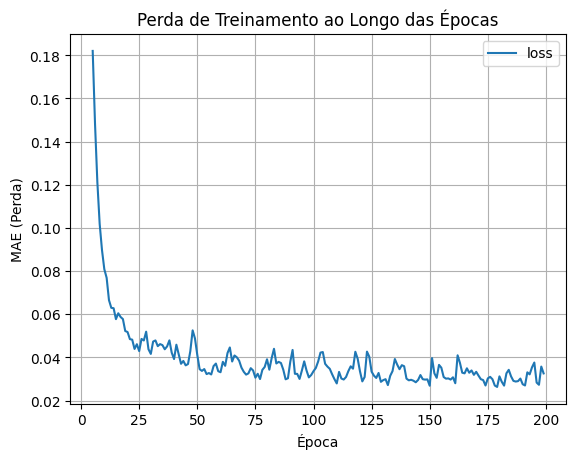


Histórico de treinamento (primeiras 10 épocas):
       loss
0  2.707669
1  0.877377
2  0.521754
3  0.341199
4  0.240642
5  0.182024
6  0.148250
7  0.121293
8  0.101836
9  0.089707


In [19]:
import pandas as pd # Importa pandas novamente, caso não esteja na célula anterior.
import matplotlib.pyplot as plt # Importa matplotlib para plotagem.

# Converte o histórico de treinamento em um DataFrame do Pandas para fácil visualização
history_df = pd.DataFrame(history.history)

# --- Plotar a Perda de Treinamento ---
# Começa o gráfico a partir da época 5 para ter uma visão mais clara da tendência,
# pois as primeiras épocas podem ter perdas muito altas.
plt.figure(figsize=(10, 6)) # Define o tamanho da figura
history_df.loc[5:, ['loss']].plot(title="Perda de Treinamento ao Longo das Épocas");
plt.xlabel("Época")
plt.ylabel("MAE (Perda)")
plt.grid(True)
plt.show() # Exibe o gráfico

print("\nHistórico de treinamento (primeiras 10 épocas):")
print(history_df.head(10))


**Explicação**:

*   **history_df = pd.DataFrame(history.history):** O objeto history contém um dicionário (history.history) onde as chaves são os nomes das métricas (neste caso, 'loss' para MAE) e os valores são listas dos valores da métrica para cada época. Convertemos isso em um DataFrame do Pandas para facilitar a plotagem.

*   **history_df.loc[5:, ['loss']].plot(...):**
*   **history_df.loc[5:, ['loss']]** seleciona todas as linhas a partir da época 5 (índice 5, já que os índices das épocas começam em 0) e apenas a coluna 'loss'.
*   **.plot()** cria um gráfico de linha.
o	title, xlabel, ylabel, grid: São para melhorar a legibilidade do gráfico.
*   **plt.show():** Exibe o gráfico.

*   **O que observar no gráfico de perda:**

*   **Perda Decrescente:** Idealmente, você quer ver a curva de perda diminuir constantemente ao longo das épocas. Isso indica que o modelo está aprendendo e melhorando suas previsões.
*   **Platô:** Se a perda parar de diminuir e se estabilizar (formar um platô), pode significar que o modelo aprendeu o máximo que pode com a arquitetura e os hiperparâmetros atuais, ou que o learning rate é muito baixo.
*   **Aumento da Perda:** Se a perda começar a aumentar após um período de diminuição, pode ser um sinal de overfitting, especialmente se você também estivesse observando uma métrica de validação (que não está no seu código, mas é comum em treinamento real).